In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [27]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(8000, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x 

# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(1, 12, kernel_size=5)
#         self.conv2 = nn.Conv2d(12, 24, kernel_size=5)
#         self.conv2_drop = nn.Dropout2d()
#         self.fc1 = nn.Linear(384, 50)
#         self.fc2 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
#         x = x.view(-1, 384)
#         x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
#         x = self.fc2(x)
#         return F.log_softmax(x)
    
net = Network()

In [28]:
import irnet

mod_ver = 2

if mod_ver == 1:
    model = irnet.IRNet()
    model.load_state_dict(torch.load('model-geometric-1-.pt'))
    model.eval()
    print("model verion 1.0")
else:
    model = irnet.IRNet()
    model.load_state_dict(torch.load('model-geometric-1b-.pt'))
    model.eval()
    print("model verion 2.0")

model verion 2.0


In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.5)

In [30]:
params = list(net.parameters())

In [31]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))])

mnist_train = datasets.MNIST(root = './data', train = True, download = True, transform = None)
mnist_test = datasets.MNIST(root = './data', train = True,
                                             download = True, 
                                             transform = transform)
trainloader = torch.utils.data.DataLoader(mnist_test, batch_size = 64, shuffle = True)

dataiter = iter(trainloader)
images, labels = dataiter.next()

In [32]:
import torchvision

for epoch in range(3):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data 
        optimizer.zero_grad()
        
        outputs = net(inputs)
#         loss = F.nll_loss(outputs, labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f'{epoch+1}, {i + 1:5d}: loss: {loss.item()}')
            running_loss = 0.0
        
print('finished_training')

1,     1: loss: 2.3081228733062744
1,   101: loss: 0.671678900718689
1,   201: loss: 0.5437464714050293
1,   301: loss: 0.1949746161699295
1,   401: loss: 0.31748053431510925
1,   501: loss: 0.26884379982948303
1,   601: loss: 0.18263153731822968
1,   701: loss: 0.10800749808549881
1,   801: loss: 0.19500721991062164
1,   901: loss: 0.11239691078662872
2,     1: loss: 0.10422608256340027
2,   101: loss: 0.1703902631998062
2,   201: loss: 0.2701766788959503
2,   301: loss: 0.08714456856250763
2,   401: loss: 0.09478361904621124
2,   501: loss: 0.10004829615354538
2,   601: loss: 0.06676868349313736
2,   701: loss: 0.18372881412506104
2,   801: loss: 0.1814347803592682
2,   901: loss: 0.05324046313762665
3,     1: loss: 0.07119002938270569
3,   101: loss: 0.14901576936244965
3,   201: loss: 0.11573447287082672
3,   301: loss: 0.08028315752744675
3,   401: loss: 0.10046392679214478
3,   501: loss: 0.06685127317905426
3,   601: loss: 0.052885495126247406
3,   701: loss: 0.07690481096506119

In [33]:
torch.save(net.state_dict(), 'model.pth')
torch.save(optimizer.state_dict(), 'optimizer.pth')

In [116]:
## Set and remove the activation hooks for specified layers
from torchvision import transforms

filename = 'images/puppy.jpg'

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

sample_img = Image.open(filename)
sample_img = preprocess(sample_img)
sample_img = sample_img[0].reshape(1, 1, 224, -1)

dic = 0
dic = {}
dict_len = range(8)

def getactivation(name):
    def hook_func(m , inp ,op):
        dic[name] = op.detach()
    return hook_func


def create_name(name, model, layer_num):
    hook = {}
    for n, ln in zip(name, layer_num):
        hook[n] = model[ln]
    return hook


def f_hook(hook, name, var):    
    k = {}
    for n, v in zip(name, var):
        k[v] = hook[n].register_forward_hook(getactivation(v))
    return k
        
def remove_hook(k):
    for i in dict_len:
        k['c{}'.format(i)].remove()
c1.remove()


name = []
var = []
for i in dict_len:
    n = 'conv{}'.format(i+1)
    v = 'c{}'.format(i+1)
    name.append(n)
    var.append(v)

hook = create_name(name, model.elayers, dict_len)
k = f_hook(hook, name, var)

output = model((sample_img))

output = output.detach().numpy()
for i in dict_len:
    print(dic['c{}'.format(i+1)].shape)


torch.Size([1, 32, 224, 224])
torch.Size([1, 32, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])


In [117]:
## Isolate the weights for the convolutional layers

params = list(model.parameters())
nparams = list(model.named_parameters())
params[4].shape

torch.Size([32, 32, 3, 3])

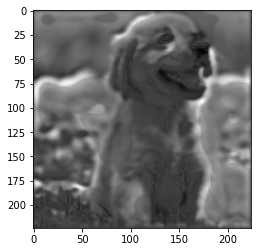

In [118]:
plt.imshow(output[0].transpose(1, 2, 0), cmap = 'gray')

torch.Size([32, 3, 3])


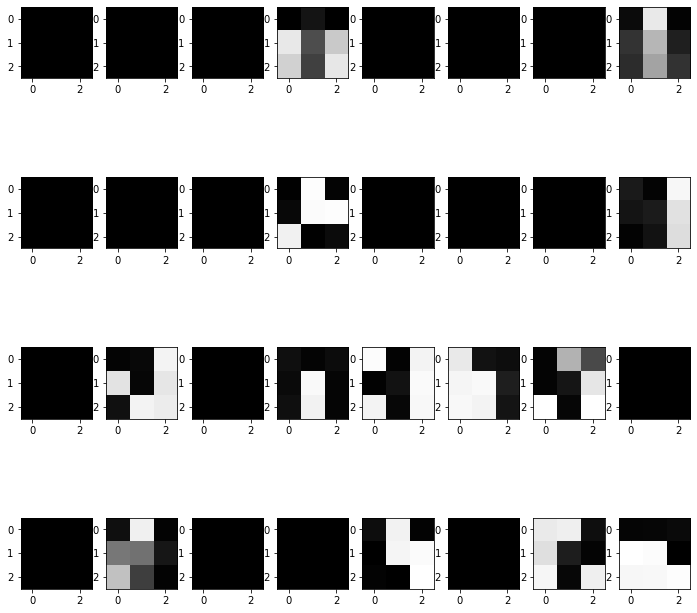

In [119]:
## Plot the weights tensors for the convolutional layers as an image

from PIL import Image
import matplotlib.pyplot as plt

trans = torchvision.transforms.ToPILImage()

conv1_w = params[4][0]
print(params[4][0].shape)

_, axs = plt.subplots(4, 8, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(conv1_w, axs):
    ax.imshow(trans(img), cmap='gray', vmin=0, vmax=255)
plt.show()

In [89]:
## Get a random sample image and label from the dataloder

for img, label in trainloader:
    sample_img = img[0]
    sample_label = label[0]

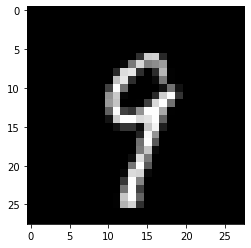

In [90]:
plt.imshow(sample_img[0], cmap = 'gray')

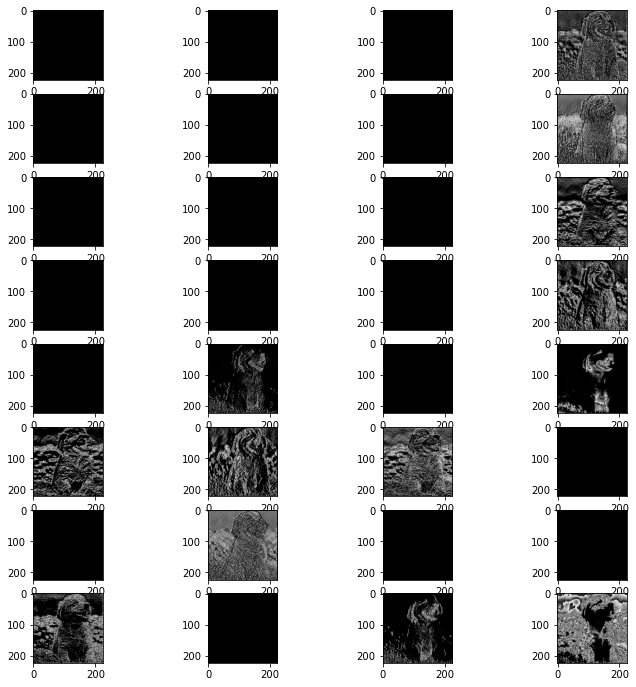

torch.Size([1, 32, 224, 224])

In [120]:
## Plot the activations for the first conv layer `conv1`

layer = 'c1'

_, axs = plt.subplots(8, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic[layer][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()
dic[layer].shape

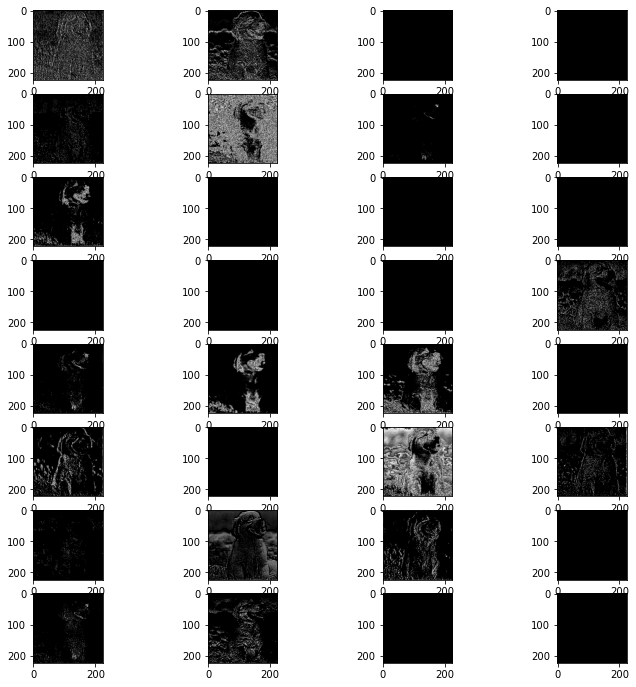

torch.Size([1, 32, 224, 224])

In [121]:
_, axs = plt.subplots(8, 4, figsize=(12, 12))
axs = axs.flatten()

for img, ax in zip(dic['c2'][0], axs):
    ax.imshow(trans(img), cmap='gray')

plt.show()
dic['c2'].shape

In [105]:
params = list(model.named_parameters())
for name, _ in params:
    print(name)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


elayers.0.conv.weight
elayers.0.conv.bias
elayers.0.batch.weight
elayers.0.batch.bias
elayers.1.conv.weight
elayers.1.conv.bias
elayers.1.batch.weight
elayers.1.batch.bias
elayers.2.conv.weight
elayers.2.conv.bias
elayers.2.batch.weight
elayers.2.batch.bias
elayers.3.conv.weight
elayers.3.conv.bias
elayers.3.batch.weight
elayers.3.batch.bias
elayers.4.conv.weight
elayers.4.conv.bias
elayers.4.batch.weight
elayers.4.batch.bias
elayers.5.conv.weight
elayers.5.conv.bias
elayers.5.batch.weight
elayers.5.batch.bias
elayers.6.conv.weight
elayers.6.conv.bias
elayers.6.batch.weight
elayers.6.batch.bias
elayers.7.conv.weight
elayers.7.conv.bias
elayers.7.batch.weight
elayers.7.batch.bias
elayers.8.conv.weight
elayers.8.conv.bias
elayers.8.batch.weight
elayers.8.batch.bias
elayers.9.conv.weight
elayers.9.conv.bias
elayers.9.batch.weight
elayers.9.batch.bias
elayers.10.conv.weight
elayers.10.conv.bias
elayers.10.batch.weight
elayers.10.batch.bias
elayers.11.conv.weight
elayers.11.conv.bias
elayer